### Imports

In [2197]:
import sqldf
from numpy import nan 
import pandas as pd
import math
import re
import requests
import overpy
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

In [2198]:
pd.reset_option('all')


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



C:\Users\Klaudia\anaconda3\lib\site-packages\pandas\_config\config.py:622: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [2199]:
houses_data = pd.read_csv('C:/Users/Klaudia/Desktop/Project/RealEstatePricePrediction/data_to_join/houses_data.csv')

In [2200]:
houses_data

,Index,Cena,Cena za metr kwadratowy,Ilość pokoi,Powierzchnia,Lokalizacja,Ogrzewanie,Powierzchnia działki,Stan wykończenia,Rodzaj zabudowy,...,Dach,Pokrycie dachu,Poddasze,Media,Zabezpieczenia,Ogrodzenie,Dojazd,Położenie,Okolica,Informacje dodatkowe
0,0,315 000 zł,5122 zł/m2,3 pokoje,"61,5 m²","ul. Braci Koszutzkich, Mława, mławski, mazowie...",zapytaj,316 m²,do zamieszkania,wolnostojący,...,skośny,blacha,nieużytkowe,brak informacji,brak informacji,brak informacji,brak informacji,miasto,brak informacji,brak informacji
1,1,1 570 000 zł,10 467 zł/m2,7 pokoi,150 m²,"Mokrosęk, mazowieckie",pompa ciepła,11 000 m²,do zamieszkania,wolnostojący,...,skośny,blacha,brak informacji,"szambo, prąd, internet, woda","system alarmowy, domofon / wideofon, monitorin...","murowane, metalowe, siatka",asfaltowy,pod miastem,las,brak informacji
2,2,539 000 zł,5390 zł/m2,5 pokoi,100 m²,"Chojniczki, ul. Świerkowa 11, Chojnice, pomorskie",gazowe,320 m²,do wykończenia,zapytaj,...,skośny,dachówka,brak,"prąd, gaz, kanalizacja, woda",teren zamknięty,brak informacji,brak informacji,brak informacji,"las, jezioro",brak informacji
3,3,610 000 zł,4000 zł/m2,4 pokoje,"152,49 m²","Kosakowo, pomorskie",gazowe,162 m²,do wykończenia,bliźniak,...,płaski,dachówka,użytkowe,"telewizja kablowa, prąd, gaz, internet, kanali...","system alarmowy, drzwi / okna antywłamaniowe, ...",brak informacji,utwardzony,pod miastem,las,brak informacji
4,4,599 000 zł,4792 zł/m2,5 pokoi,125 m²,"Kębłowice, dolnośląskie",pompa ciepła,518 m²,do wykończenia,bliźniak,...,skośny,dachówka,użytkowe,"szambo, prąd, woda",rolety antywłamaniowe,metalowe,utwardzony,pod miastem,brak informacji,strych
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,955,1 370 000 zł,8563 zł/m2,5 pokoi,160 m²,"Katowice, Szopienice - Burowiec, Burowiec, Sie...",gazowe,400 m²,do wykończenia,bliźniak,...,płaski,brak informacji,brak,"prąd, gaz, internet, telefon, kanalizacja, woda","drzwi / okna antywłamaniowe, teren zamknięty, ...",brak informacji,asfaltowy,miasto,jezioro,brak informacji
875,956,590 000 zł,3391 zł/m2,7 pokoi,174 m²,"Stanisławów Drugi, łódzkie","węglowe, kominkowe, olejowe",2500 m²,do zamieszkania,wolnostojący,...,skośny,blacha,użytkowe,"prąd, internet, kanalizacja, woda, oczyszczalnia","system alarmowy, drzwi / okna antywłamaniowe, ...","murowane, metalowe",asfaltowy,wieś,las,brak informacji
876,957,1 048 000 zł,3493 zł/m2,5 pokoi,300 m²,"Węgierska Górka, śląskie",biomasa,1200 m²,do zamieszkania,wolnostojący,...,skośny,blacha,użytkowe,"prąd, telefon, kanalizacja, woda",teren zamknięty,"metalowe, siatka",asfaltowy,wieś,góry,"strych, piwnica"
877,958,1 650 000 zł,8967 zł/m2,7 pokoi,184 m²,"Czarna Górna, podkarpackie",kominkowe,5000 m²,do zamieszkania,wolnostojący,...,brak informacji,brak informacji,brak informacji,"szambo, prąd, woda",brak informacji,drewniane,asfaltowy,wieś,góry,brak informacji


### File reading

In [2201]:
data = pd.read_csv('C:/Users/Klaudia/Desktop/Project/RealEstatePricePrediction/data_to_join/flats_data.csv', index_col = 0)
data = data.drop(['Dostępne od', 'Ilość pokoi', 'Media', 'Obsługa zdalna', 'Typ ogłoszeniodawcy', 'Materiał budynku'], axis = 1)

In [2202]:
data.rename(columns = {'Cena': 'price', 'Cena za metr kwadratowy': 'price_per_square_meter', 'Powierzchnia': 'area', 'Lokalizacja': 'location', 'Forma własności': 'ownership', 'Liczba pokoi': 'number_of_rooms', 'Stan wykończenia': 'finishing_standard', 'Piętro': 'floor', 'Balkon / ogród / taras': 'balcony/garden/terrace', 'Czynsz': 'rent', 'Miejsce parkingowe': 'parking', 'Ogrzewanie': 'heating', 'Rynek': 'market', 'Rok budowy': 'construction_year', 'Rodzaj zabudowy': 'building_type', 'Okna': 'windows', 'Winda': 'lift', 'Zabezpieczenia': 'security', 'Wyposażenie': 'furnishings', 'Informacje dodatkowe': 'additional_information'}, inplace=True)

In [2203]:
data.head()

,price,price_per_square_meter,area,location,ownership,number_of_rooms,finishing_standard,floor,balcony/garden/terrace,rent,parking,heating,market,construction_year,building_type,windows,lift,security,furnishings,additional_information
Index,,,,,,,,,,,,,,,,,,,,
0,339 000 zł,10 935 zł/m2,31 m²,"Warszawa, Białołęka, Nowodwory, ul. Aluzyjna 33F",pełna własność,1,do zamieszkania,4/7,balkon,zapytaj,garaż/miejsce parkingowe,miejskie,wtórny,2005,blok,plastikowe,tak,"teren zamknięty, domofon / wideofon","lodówka, meble, piekarnik, kuchenka, pralka",brak informacji
1,480 000 zł,9600 zł/m2,50 m²,"Gdańsk, Ujeścisko-Łostowice, Ujeścisko",pełna własność,2,zapytaj,2/3,balkon,450 zł,garaż/miejsce parkingowe,zapytaj,wtórny,2006,brak informacji,plastikowe,nie,brak informacji,"zmywarka, lodówka, meble, kuchenka, telewizor,...",piwnica
2,319 000 zł,5407 zł/m2,59 m²,"Sosnowiec, Środula",spółdzielcze własnościowe,3,zapytaj,7/10,balkon,800 zł,zapytaj,miejskie,wtórny,brak informacji,blok,plastikowe,tak,brak informacji,brak informacji,"piwnica, oddzielna kuchnia"
3,365 000 zł,6831 zł/m2,"53,43 m²","Tychy, śląskie",pełna własność,3,do zamieszkania,7/10,balkon,460 zł,zapytaj,miejskie,wtórny,brak informacji,blok,plastikowe,tak,brak informacji,brak informacji,"piwnica, oddzielna kuchnia"
4,195 000 zł,5571 zł/m2,35 m²,"Sosnowiec, Centrum",pełna własność,2,do zamieszkania,4/10,balkon,420 zł,zapytaj,miejskie,wtórny,1970,blok,plastikowe,tak,brak informacji,brak informacji,brak informacji


In [2204]:
data.describe()

,price,price_per_square_meter,area,location,ownership,number_of_rooms,finishing_standard,floor,balcony/garden/terrace,rent,parking,heating,market,construction_year,building_type,windows,lift,security,furnishings,additional_information
count,8176,7073,8176,8176,8171,8171,8171,8171,8171,8171,8171,8171,6928,6928,6928,6928,6928,6928,6928,6928
unique,2563,4565,3527,4573,5,10,4,177,11,486,2,7,2,144,8,4,2,56,92,16
top,Zapytaj o cenę,6600 zł/m2,48 m²,"Wrocław, Stare Miasto, ul. Wita Stwosza",pełna własność,3,do zamieszkania,3/4,balkon,zapytaj,garaż/miejsce parkingowe,miejskie,wtórny,brak informacji,blok,plastikowe,nie,brak informacji,brak informacji,brak informacji
freq,1103,49,95,80,5855,3136,3100,475,4329,4722,4478,3872,4706,1489,3713,4258,3859,2568,4370,2727


### Categorical columns

In [2205]:
data = data.fillna(nan)
data = data.replace({'zapytaj': nan, "Zapytaj o cenę": nan, "brak informacji": nan})

In [2206]:
categorical_columns_names = ['ownership', 'finishing_standard', 'balcony/garden/terrace', 'parking', 'heating', 'market', 'building_type', 'windows', 'lift', 'security', 'additional_information']

In [2207]:
for column_name in categorical_columns_names:
    print(column_name)
    print(data[column_name].unique())

ownership
['pełna własność' 'spółdzielcze własnościowe' 'spółdzielcze wł. z KW' nan
 'udział']
finishing_standard
['do zamieszkania' nan 'do remontu' 'do wykończenia']
balcony/garden/terrace
['balkon' nan 'taras' 'ogródek' 'taras, ogródek' 'ogródek, taras'
 'balkon, ogródek, taras' 'balkon, taras' 'taras, balkon'
 'balkon, ogródek' 'taras, balkon, ogródek']
parking
['garaż/miejsce parkingowe' nan]
heating
['miejskie' nan 'kotłownia' 'gazowe' 'inne' 'elektryczne' 'piece kaflowe']
market
['wtórny' nan 'pierwotny']
building_type
['blok' nan 'apartamentowiec' 'kamienica' 'szeregowiec' 'dom wolnostojący'
 'plomba' 'loft']
windows
['plastikowe' 'drewniane' nan 'aluminiowe']
lift
['tak' 'nie' nan]
security
['teren zamknięty, domofon / wideofon' nan
 'teren zamknięty, monitoring / ochrona'
 'drzwi / okna antywłamaniowe, domofon / wideofon, monitoring / ochrona'
 'domofon / wideofon' 'drzwi / okna antywłamaniowe, domofon / wideofon'
 'teren zamknięty, domofon / wideofon, monitoring / ochrona'
 

In [2208]:
data = data.join(pd.get_dummies(data['finishing_standard'], prefix='finishing'))
data = data.join(pd.get_dummies(data['heating'], prefix='heating'))
data = data.join(pd.get_dummies(data['building_type'], prefix='building'))

In [2209]:
data = data.assign(
    ownership_private = (data.ownership == 'pełna własność').astype(int),
    has_balkon = data['balcony/garden/terrace'].fillna('nan').apply(lambda x: ('balkon' in x)).astype(int),
    has_garden = data['balcony/garden/terrace'].fillna('nan').apply(lambda x: ('ogródek' in x)).astype(int),
    has_terrace = data['balcony/garden/terrace'].fillna('nan').apply(lambda x: ('taras' in x)).astype(int),
    has_parking = (~data.parking.isna()).astype(int),
    is_market_unknown = data.market.isna().astype(int),
    is_market_primary = (data.market == 'pierwotny').astype(int),
    has_plastic_windows = data['windows'].fillna('nan').apply(lambda x: ('plastikowe' in x)).astype(int),
    has_lift = (data.lift == 'tak').astype(int),
    has_security_protection = ~data.security.isna().astype(int),
    is_duplex = data['additional_information'].fillna('nan').apply(lambda x: ('dwupoziomowe' in x)).astype(int),
    has_basement = data['additional_information'].fillna('nan').apply(lambda x: ('piwnica' in x)).astype(int))

In [2210]:
data

,price,price_per_square_meter,area,location,ownership,number_of_rooms,finishing_standard,floor,balcony/garden/terrace,rent,...,has_garden,has_terrace,has_parking,is_market_unknown,is_market_primary,has_plastic_windows,has_lift,has_security_protection,is_duplex,has_basement
Index,,,,,,,,,,,,,,,,,,,,,
0,339 000 zł,10 935 zł/m2,31 m²,"Warszawa, Białołęka, Nowodwory, ul. Aluzyjna 33F",pełna własność,1,do zamieszkania,4/7,balkon,NaN,...,0,0,1,0,0,1,1,-1,0,0
1,480 000 zł,9600 zł/m2,50 m²,"Gdańsk, Ujeścisko-Łostowice, Ujeścisko",pełna własność,2,NaN,2/3,balkon,450 zł,...,0,0,1,0,0,1,0,-2,0,1
2,319 000 zł,5407 zł/m2,59 m²,"Sosnowiec, Środula",spółdzielcze własnościowe,3,NaN,7/10,balkon,800 zł,...,0,0,0,0,0,1,1,-2,0,1
3,365 000 zł,6831 zł/m2,"53,43 m²","Tychy, śląskie",pełna własność,3,do zamieszkania,7/10,balkon,460 zł,...,0,0,0,0,0,1,1,-2,0,1
4,195 000 zł,5571 zł/m2,35 m²,"Sosnowiec, Centrum",pełna własność,2,do zamieszkania,4/10,balkon,420 zł,...,0,0,0,0,0,1,1,-2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,362 000 zł,8786 zł/m2,"41,2 m²","Wrocław, Psie Pole",pełna własność,2,do wykończenia,2/2,NaN,NaN,...,0,0,0,0,1,1,0,-1,0,0
12326,889 575 zł,11 508 zł/m2,"77,3 m²","Wrocław, Stare Miasto, Szczepin, Gnieźnieńska",pełna własność,4,NaN,parter/12,balkon,500 zł,...,0,0,0,0,1,1,0,-2,0,0
12327,570 465 zł,10 500 zł/m2,"54,33 m²","Poznań, Jeżyce, ul. Augustyna Szamarzewskiego",pełna własność,3,do wykończenia,1/3,balkon,NaN,...,0,0,1,0,1,1,1,-2,0,0


### Numerical columns

In [2211]:
#age = 2022 - data.construction_year,


In [2212]:
data_without_zl_currency = data[~data['price'].str.contains("zł", na = True)]
data_without_zl_currency = data_without_zl_currency[~data_without_zl_currency['price'].str.contains("Zapytaj o cenę", na = True)]
data_without_zl_currency

,price,price_per_square_meter,area,location,ownership,number_of_rooms,finishing_standard,floor,balcony/garden/terrace,rent,...,has_garden,has_terrace,has_parking,is_market_unknown,is_market_primary,has_plastic_windows,has_lift,has_security_protection,is_duplex,has_basement
Index,,,,,,,,,,,,,,,,,,,,,
5099,516 800 €,3230 €/m2,160 m²,"Warszawa, Mokotów, Bukowińska",pełna własność,4,NaN,8/17,balkon,NaN,...,0,0,1,0,1,0,1,-1,0,0


In [2213]:
data_without_m2_value = data[~data["area"].str.contains("m²", na = True)]
data_without_m2_value = data_without_m2_value[~data_without_m2_value["area"].str.contains("m2", na = True)]

data_without_m2_value

,price,price_per_square_meter,area,location,ownership,number_of_rooms,finishing_standard,floor,balcony/garden/terrace,rent,...,has_garden,has_terrace,has_parking,is_market_unknown,is_market_primary,has_plastic_windows,has_lift,has_security_protection,is_duplex,has_basement
Index,,,,,,,,,,,,,,,,,,,,,


In [2214]:
data['number_of_floors'] = nan
for index, row in data.iterrows():
    row = row.copy()
    floor_information = row.floor
    if(bool(floor_information) and not isinstance(floor_information, float) and '/' in floor_information):
        floor_information = floor_information.replace('parter', '0').replace('suterena', '-1')
        floor = floor_information[0:floor_information.index('/')]; 
        number_of_floors = floor_information[floor_information.index('/') + 1:]; 
        data.loc[index, 'floor'] = floor
        data.loc[index, 'number_of_floors'] = number_of_floors

In [2215]:
float_columns_names = ['price', 'price_per_square_meter', 'area', 'rent']
int_columns_names = ['number_of_rooms', 'floor', 'number_of_floors', 'construction_year']
numerical_columns_names = float_columns_names + int_columns_names
for column_name in numerical_columns_names:
    if column_name in float_columns_names: 
        data[column_name] = data[column_name].str.replace(' ', '').str.replace(',', '.').str.extract('(\d+\.*\d+)').astype(float)
    else: 
        data[column_name] = pd.to_numeric(data[column_name], errors='coerce').convert_dtypes()

In [2216]:
data

,price,price_per_square_meter,area,location,ownership,number_of_rooms,finishing_standard,floor,balcony/garden/terrace,rent,...,has_terrace,has_parking,is_market_unknown,is_market_primary,has_plastic_windows,has_lift,has_security_protection,is_duplex,has_basement,number_of_floors
Index,,,,,,,,,,,,,,,,,,,,,
0,339000.0,10935.0,31.00,"Warszawa, Białołęka, Nowodwory, ul. Aluzyjna 33F",pełna własność,1,do zamieszkania,4,balkon,NaN,...,0,1,0,0,1,1,-1,0,0,7
1,480000.0,9600.0,50.00,"Gdańsk, Ujeścisko-Łostowice, Ujeścisko",pełna własność,2,NaN,2,balkon,450.0,...,0,1,0,0,1,0,-2,0,1,3
2,319000.0,5407.0,59.00,"Sosnowiec, Środula",spółdzielcze własnościowe,3,NaN,7,balkon,800.0,...,0,0,0,0,1,1,-2,0,1,10
3,365000.0,6831.0,53.43,"Tychy, śląskie",pełna własność,3,do zamieszkania,7,balkon,460.0,...,0,0,0,0,1,1,-2,0,1,10
4,195000.0,5571.0,35.00,"Sosnowiec, Centrum",pełna własność,2,do zamieszkania,4,balkon,420.0,...,0,0,0,0,1,1,-2,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,362000.0,8786.0,41.20,"Wrocław, Psie Pole",pełna własność,2,do wykończenia,2,NaN,NaN,...,0,0,0,1,1,0,-1,0,0,2
12326,889575.0,11508.0,77.30,"Wrocław, Stare Miasto, Szczepin, Gnieźnieńska",pełna własność,4,NaN,0,balkon,500.0,...,0,0,0,1,1,0,-2,0,0,12
12327,570465.0,10500.0,54.33,"Poznań, Jeżyce, ul. Augustyna Szamarzewskiego",pełna własność,3,do wykończenia,1,balkon,NaN,...,0,1,0,1,1,1,-2,0,0,3


In [2217]:
# complete_data = data[pd.notnull(data['price'])] ## get data without unset values
# complete_data = complete_data[pd.notnull(complete_data['price_per_square_meter'])]
# complete_data = complete_data[pd.notnull(complete_data['number_of_rooms'])]
# complete_data = complete_data[pd.notnull(complete_data['area'])]
# complete_data = complete_data[pd.notnull(complete_data['location'])]
# complete_data

In [2218]:
data.dtypes

price                        float64
price_per_square_meter       float64
area                         float64
location                      object
ownership                     object
number_of_rooms                Int64
finishing_standard            object
floor                          Int64
balcony/garden/terrace        object
rent                         float64
parking                       object
heating                       object
market                        object
construction_year              Int64
building_type                 object
windows                       object
lift                          object
security                      object
furnishings                   object
additional_information        object
finishing_do remontu           uint8
finishing_do wykończenia       uint8
finishing_do zamieszkania      uint8
heating_elektryczne            uint8
heating_gazowe                 uint8
heating_inne                   uint8
heating_kotłownia              uint8
h

In [2219]:
not_complete_data = data[data.isnull().any(axis=1)]
not_complete_data

,price,price_per_square_meter,area,location,ownership,number_of_rooms,finishing_standard,floor,balcony/garden/terrace,rent,...,has_terrace,has_parking,is_market_unknown,is_market_primary,has_plastic_windows,has_lift,has_security_protection,is_duplex,has_basement,number_of_floors
Index,,,,,,,,,,,,,,,,,,,,,
0,339000.0,10935.0,31.00,"Warszawa, Białołęka, Nowodwory, ul. Aluzyjna 33F",pełna własność,1,do zamieszkania,4,balkon,NaN,...,0,1,0,0,1,1,-1,0,0,7
1,480000.0,9600.0,50.00,"Gdańsk, Ujeścisko-Łostowice, Ujeścisko",pełna własność,2,NaN,2,balkon,450.0,...,0,1,0,0,1,0,-2,0,1,3
2,319000.0,5407.0,59.00,"Sosnowiec, Środula",spółdzielcze własnościowe,3,NaN,7,balkon,800.0,...,0,0,0,0,1,1,-2,0,1,10
3,365000.0,6831.0,53.43,"Tychy, śląskie",pełna własność,3,do zamieszkania,7,balkon,460.0,...,0,0,0,0,1,1,-2,0,1,10
4,195000.0,5571.0,35.00,"Sosnowiec, Centrum",pełna własność,2,do zamieszkania,4,balkon,420.0,...,0,0,0,0,1,1,-2,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,362000.0,8786.0,41.20,"Wrocław, Psie Pole",pełna własność,2,do wykończenia,2,NaN,NaN,...,0,0,0,1,1,0,-1,0,0,2
12326,889575.0,11508.0,77.30,"Wrocław, Stare Miasto, Szczepin, Gnieźnieńska",pełna własność,4,NaN,0,balkon,500.0,...,0,0,0,1,1,0,-2,0,0,12
12327,570465.0,10500.0,54.33,"Poznań, Jeżyce, ul. Augustyna Szamarzewskiego",pełna własność,3,do wykończenia,1,balkon,NaN,...,0,1,0,1,1,1,-2,0,0,3


#### Filling nan data with a median

In [2220]:
for column_name in numerical_columns_names:
    data[column_name].fillna(math.floor(data[column_name].median()), inplace=True)

#### Price

<AxesSubplot:ylabel='Frequency'>

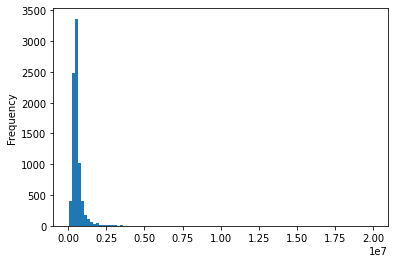

In [2221]:
data.price.plot.hist(bins = 100)

In [2222]:
data = data[data.price > 20_000]

In [2223]:
#### Price per square meter

<AxesSubplot:ylabel='Frequency'>

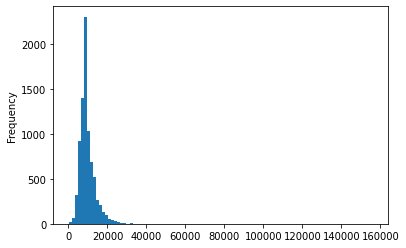

In [2224]:
data.price_per_square_meter.plot.hist(bins = 100)

In [2225]:
data = data[data.price_per_square_meter > 1_000][data.price_per_square_meter < 70_000]

<ipython-input-2225-30d02635e9d7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[data.price_per_square_meter > 1_000][data.price_per_square_meter < 70_000]


#### Area

<AxesSubplot:ylabel='Frequency'>

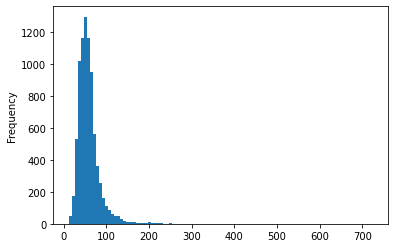

In [2226]:
data.area.plot.hist(bins = 100)

In [2227]:
data = data[data.area > 10][data.area < 350]

#### Rent

<AxesSubplot:ylabel='Frequency'>

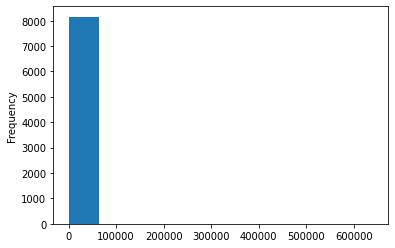

In [2228]:
data.rent.plot.hist(bins = 10)

In [2229]:
data = data[data.rent < 2_000]

#### Number of rooms

<AxesSubplot:ylabel='Frequency'>

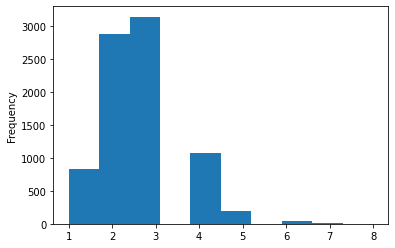

In [2230]:
data.number_of_rooms.plot.hist(bins = 10)

#### Floor

<AxesSubplot:ylabel='Frequency'>

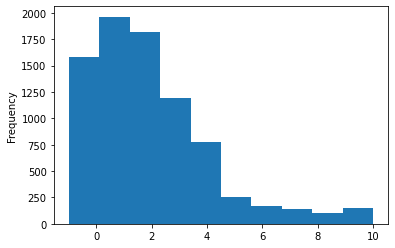

In [2231]:
data.floor.plot.hist(bins = 10)

#### Number of floors

<AxesSubplot:ylabel='Frequency'>

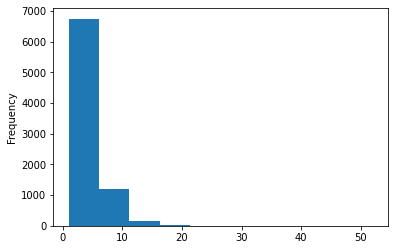

In [2232]:
data.number_of_floors.plot.hist(bins = 10)

#### Construction year

<AxesSubplot:ylabel='Frequency'>

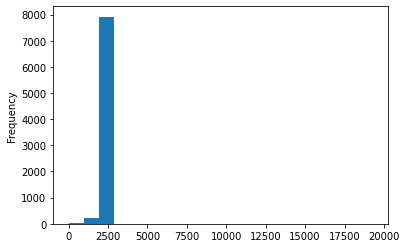

In [2233]:
data.construction_year.plot.hist(bins = 20)

In [2234]:
data = data[data.construction_year > 1880][data.construction_year < 2025]

<ipython-input-2234-a73f9e5abadb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[data.construction_year > 1880][data.construction_year < 2025]


In [2235]:
data = data.assign(age = 2022 - data.construction_year)
data['age'] = np.log10(data['age'])

C:\Users\Klaudia\anaconda3\lib\site-packages\pandas\core\arrays\integer.py:428: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs2, **kwargs)
C:\Users\Klaudia\anaconda3\lib\site-packages\pandas\core\arrays\integer.py:428: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs2, **kwargs)


In [2236]:
data.columns

Index(['price', 'price_per_square_meter', 'area', 'location', 'ownership',
       'number_of_rooms', 'finishing_standard', 'floor',
       'balcony/garden/terrace', 'rent', 'parking', 'heating', 'market',
       'construction_year', 'building_type', 'windows', 'lift', 'security',
       'furnishings', 'additional_information', 'finishing_do remontu',
       'finishing_do wykończenia', 'finishing_do zamieszkania',
       'heating_elektryczne', 'heating_gazowe', 'heating_inne',
       'heating_kotłownia', 'heating_miejskie', 'heating_piece kaflowe',
       'building_apartamentowiec', 'building_blok',
       'building_dom wolnostojący', 'building_kamienica', 'building_loft',
       'building_plomba', 'building_szeregowiec', 'ownership_private',
       'has_balkon', 'has_garden', 'has_terrace', 'has_parking',
       'is_market_unknown', 'is_market_primary', 'has_plastic_windows',
       'has_lift', 'has_security_protection', 'is_duplex', 'has_basement',
       'number_of_floors', 'age'],
 

In [2237]:
def get_address_details(location):
    location = re.sub(r'\w*\.\w*', '', location).strip()
    r = requests.get(f'https://nominatim.openstreetmap.org/search/{location}?format=json&addressdetails=1')
    if(bool(r.json())):
        result = r.json()[0]
        address_details = result['address']
        return {'latitude': result['lat'], 'longtitude': result['lon'], 'city': address_details.get('city', nan), 'state': address_details.get('state', nan), 'village': address_details.get('village', nan), 'town': address_details.get('town', nan)}


def get_population(locality):
    r = requests.get(f'https://public.opendatasoft.com/api/records/1.0/search/?dataset=geonames-all-cities-with-a-population-1000&q={locality}')
    if(bool(r.json().get('records'))):
        return r.json().get('records')[0].get('fields').get('population')

In [2238]:
def get_time_to_nearest_point(point_type, lat, lon):
    result = requests.get(f'https://nominatim.openstreetmap.org/search.php?q={point_type}+near+{lat},{lon}&format=jsonv2&limit=1').json()
    if(bool(result)):
        point_lat = result[0].get('lat')
        point_lon = result[0].get('lon')
        duration = requests.get(f'https://router.project-osrm.org/route/v1/car/{lon},{lat};{point_lon},{point_lat}?overview=false').json().get('routes')[0].get('duration') 
        return duration / 60 #convert to km

def get_time_to_nearest_shop(lat, lon):
    time_to_nearest_supermarket = get_time_to_nearest_point('supermarket', lat, lon)
    time_to_nearest_convenience_shop = get_time_to_nearest_point('convenience_shop', lat, lon)
    
    return min(time_to_nearest_supermarket or 100000, time_to_nearest_convenience_shop or 100000)

def get_time_to_nearest_stop(lat, lon):
    time_to_nearest_bus_stop = get_time_to_nearest_point('bus stop', lat, lon)
    time_to_nearest_tram_stop = get_time_to_nearest_point('tram stop', lat, lon)
    
    return min(time_to_nearest_bus_stop or 100000, time_to_nearest_tram_stop or 100000) 

def get_time_to_centre(lat, lon, location):
    result = requests.get(f'https://nominatim.openstreetmap.org/search/{location}?format=json&addressdetails=1').json()
    if(bool(result)):
        centre_lat = result[0].get('lat')
        centre_lon = result[0].get('lon')
        duration = requests.get(f'https://router.project-osrm.org/route/v1/car/{lon},{lat};{centre_lon},{centre_lat}?overview=false').json().get('routes')[0].get('duration')  
        return duration / 60 #convert to km

In [2239]:
data['population'] = nan
data['locality'] = nan
data['type_of_locality'] = nan

data['time_to_nearest_shop'] = nan
data['time_to_nearest_stop'] = nan
data['time_to_centre'] = nan

In [2240]:
data.reset_index(inplace=True)
data = data.head(200)

In [2241]:
data

,Index,price,price_per_square_meter,area,location,ownership,number_of_rooms,finishing_standard,floor,balcony/garden/terrace,...,is_duplex,has_basement,number_of_floors,age,population,locality,type_of_locality,time_to_nearest_shop,time_to_nearest_stop,time_to_centre
0,0,339000.0,10935.0,31.00,"Warszawa, Białołęka, Nowodwory, ul. Aluzyjna 33F",pełna własność,1,do zamieszkania,4,balkon,...,0,0,7,1.230449,NaN,NaN,NaN,NaN,NaN,NaN
1,1,480000.0,9600.0,50.00,"Gdańsk, Ujeścisko-Łostowice, Ujeścisko",pełna własność,2,NaN,2,balkon,...,0,1,3,1.204120,NaN,NaN,NaN,NaN,NaN,NaN
2,2,319000.0,5407.0,59.00,"Sosnowiec, Środula",spółdzielcze własnościowe,3,NaN,7,balkon,...,0,1,10,0.778151,NaN,NaN,NaN,NaN,NaN,NaN
3,3,365000.0,6831.0,53.43,"Tychy, śląskie",pełna własność,3,do zamieszkania,7,balkon,...,0,1,10,0.778151,NaN,NaN,NaN,NaN,NaN,NaN
4,4,195000.0,5571.0,35.00,"Sosnowiec, Centrum",pełna własność,2,do zamieszkania,4,balkon,...,0,0,10,1.716003,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,416,849900.0,8087.0,105.10,"Wrocław, Śródmieście",pełna własność,3,do zamieszkania,1,NaN,...,0,1,5,1.963788,NaN,NaN,NaN,NaN,NaN,NaN
196,417,474000.0,8929.0,65.47,"Kraków, Dębniki, ul. Krokusowa",pełna własność,3,do wykończenia,1,balkon,...,0,0,6,0.778151,NaN,NaN,NaN,NaN,NaN,NaN
197,418,540000.0,8852.0,61.00,"Skórzewo, wielkopolskie",NaN,3,NaN,2,balkon,...,0,0,2,0.477121,NaN,NaN,NaN,NaN,NaN,NaN
198,419,474000.0,8929.0,53.95,"Łódź, Bałuty, Romanowska",pełna własność,2,do wykończenia,1,balkon,...,0,0,4,0.778151,NaN,NaN,NaN,NaN,NaN,NaN


In [2242]:
for index, row in data.iterrows():
    print(f'{index}')
    row = row.copy()
    location = row.location 
    dict_temp = get_address_details(location)
    if(bool(dict_temp)):
        data.loc[index, 'state'] = dict_temp.get('state')

        if(isinstance(dict_temp.get('city'), str)):
            data.loc[index, 'locality'] = dict_temp.get('city')
            data.loc[index, 'population'] = get_population(dict_temp.get('city'))
            data.loc[index, 'type_of_locality'] = 'city'
        if(isinstance(dict_temp.get('village'), str)):
            data.loc[index, 'locality'] = dict_temp.get('village')
            data.loc[index, 'population'] = get_population(dict_temp.get('village'))
            data.loc[index, 'type_of_locality'] = 'village'
        if(isinstance(dict_temp.get('town'), str)):
            data.loc[index, 'locality'] = dict_temp.get('town')
            data.loc[index, 'population'] = get_population(dict_temp.get('town'))
            data.loc[index, 'type_of_locality'] = 'town'
        
        latitude = dict_temp.get('latitude')
        longtitude = dict_temp.get('longtitude')
        locality = data.iloc[index]['locality']
        data.loc[index, 'time_to_nearest_shop'] = get_time_to_nearest_shop(latitude, longtitude)
        data.loc[index, 'time_to_nearest_stop'] = get_time_to_nearest_stop(latitude, longtitude)
        data.loc[index, 'time_to_centre'] = get_time_to_centre(latitude, longtitude, locality)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [2243]:
columns_to_drop = [
    'finishing_standard', 
    'balcony/garden/terrace',
    'parking',
    'heating',
    'building_type',
    'lift',
    'additional_information',
    'ownership',
    'parking',
    'construction_year',
    'windows',
    'security',
    'location',
    'furnishings'
]
data = data.drop(columns=columns_to_drop)

In [ ]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [2245]:
data.to_csv('./enriched_flats_data.csv')

In [2246]:
data.describe()

,Index,price,price_per_square_meter,area,number_of_rooms,floor,rent,finishing_do remontu,finishing_do wykończenia,finishing_do zamieszkania,...,has_lift,has_security_protection,is_duplex,has_basement,number_of_floors,age,population,time_to_nearest_shop,time_to_nearest_stop,time_to_centre
count,131.000000,1.310000e+02,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,...,131.000000,131.000000,131.0,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,185.442748,5.411878e+05,9171.175573,55.653359,2.549618,2.480916,502.839695,0.129771,0.083969,0.648855,...,0.404580,-1.465649,0.0,0.610687,4.755725,-inf,216522.358779,2.132684,1.225254,13.913804
std,128.217853,4.999578e+05,4893.790289,21.299845,0.852271,2.209598,167.190394,0.337341,0.278407,0.479161,...,0.492695,0.500733,0.0,0.489466,2.648923,NaN,215581.468019,1.956204,1.392178,42.350119
min,0.000000,4.100000e+04,1300.000000,19.500000,1.000000,0.000000,90.000000,0.000000,0.000000,0.000000,...,0.000000,-2.000000,0.0,0.000000,2.000000,-inf,1700.000000,0.100000,0.016667,0.000000
25%,58.500000,2.865000e+05,5656.000000,39.050000,2.000000,1.000000,425.000000,0.000000,0.000000,0.000000,...,0.000000,-2.000000,0.0,0.000000,3.000000,0.778151,47285.000000,0.755000,0.355833,4.049167
50%,170.000000,4.100000e+05,8385.000000,51.460000,3.000000,2.000000,480.000000,0.000000,0.000000,1.000000,...,0.000000,-1.000000,0.0,1.000000,4.000000,0.778151,158382.000000,1.591667,0.816667,7.316667
75%,268.500000,6.095000e+05,11168.500000,65.000000,3.000000,4.000000,550.000000,0.000000,0.000000,1.000000,...,1.000000,-1.000000,0.0,1.000000,5.000000,1.537408,360044.000000,2.802500,1.476667,12.902500
max,416.000000,3.650000e+06,32086.000000,157.800000,6.000000,10.000000,1370.000000,1.000000,1.000000,1.000000,...,1.000000,-1.000000,0.0,1.000000,16.000000,2.086360,768755.000000,11.096667,8.801667,348.775000


In [2247]:
data.dtypes

Index                          int64
price                        float64
price_per_square_meter       float64
area                         float64
number_of_rooms                Int64
floor                          Int64
rent                         float64
market                        object
finishing_do remontu           uint8
finishing_do wykończenia       uint8
finishing_do zamieszkania      uint8
heating_elektryczne            uint8
heating_gazowe                 uint8
heating_inne                   uint8
heating_kotłownia              uint8
heating_miejskie               uint8
heating_piece kaflowe          uint8
building_apartamentowiec       uint8
building_blok                  uint8
building_dom wolnostojący      uint8
building_kamienica             uint8
building_loft                  uint8
building_plomba                uint8
building_szeregowiec           uint8
ownership_private              int32
has_balkon                     int32
has_garden                     int32
h

In [2248]:
data.isna().sum()

Index                        0
price                        0
price_per_square_meter       0
area                         0
number_of_rooms              0
floor                        0
rent                         0
market                       0
finishing_do remontu         0
finishing_do wykończenia     0
finishing_do zamieszkania    0
heating_elektryczne          0
heating_gazowe               0
heating_inne                 0
heating_kotłownia            0
heating_miejskie             0
heating_piece kaflowe        0
building_apartamentowiec     0
building_blok                0
building_dom wolnostojący    0
building_kamienica           0
building_loft                0
building_plomba              0
building_szeregowiec         0
ownership_private            0
has_balkon                   0
has_garden                   0
has_terrace                  0
has_parking                  0
is_market_unknown            0
is_market_primary            0
has_plastic_windows          0
has_lift

In [2257]:
modeling_data = data[['price', 'area', 'number_of_rooms', 'floor', 'rent', 
'ownership_private', 'has_balkon', 'has_garden', 'has_terrace', 'has_parking', 'is_market_primary']]

In [2258]:
modeling_data

,price,area,number_of_rooms,floor,rent,ownership_private,has_balkon,has_garden,has_terrace,has_parking,is_market_primary
0,339000.0,31.00,1,4,480.0,1,1,0,0,1,0
1,480000.0,50.00,2,2,450.0,1,1,0,0,1,0
2,319000.0,59.00,3,7,800.0,0,1,0,0,0,0
3,365000.0,53.43,3,7,460.0,1,1,0,0,0,0
4,195000.0,35.00,2,4,420.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
126,485000.0,65.00,3,0,480.0,1,0,1,0,0,1
127,389000.0,37.50,2,4,350.0,1,1,0,0,0,0
128,799000.0,103.27,4,1,480.0,1,1,0,0,1,0
129,165000.0,36.60,2,4,480.0,0,1,0,0,0,0


In [2259]:
y = modeling_data.pop('price')
X = modeling_data.copy()

In [2260]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [2272]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [2273]:
pd.DataFrame([model.coef_, X.columns]).T.sort_values(0)

,0,1
1,-205875,number_of_rooms
6,-150917,has_garden
5,-108492,has_balkon
4,-45881.8,ownership_private
3,303.416,rent
2,9461.55,floor
0,23458.7,area
8,50316.9,has_parking
9,76847.2,is_market_primary
7,165806,has_terrace


In [2274]:
from sklearn.metrics import r2_score
y_pred_test = model.predict(X_test)
r2_score_value_test = r2_score(y_true=y_test, y_pred=y_pred_test)
y_pred_train = model.predict(X_train)
r2_score_value_train = r2_score(y_true=y_train, y_pred=y_pred_train)
r2_score_value_train, r2_score_value_test

(0.5862689162798276, 0.40861344358657425)

In [2283]:
from sklearn.tree import DecisionTreeRegressor

In [2284]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [2285]:
y_pred_test = model.predict(X_test)
r2_score_value_test = r2_score(y_true=y_test, y_pred=y_pred_test)
y_pred_train = model.predict(X_train)
r2_score_value_train = r2_score(y_true=y_train, y_pred=y_pred_train)
r2_score_value_train, r2_score_value_test

(1.0, -0.9629449336862015)

In [2286]:
#XGBoost 

In [2287]:
import xgboost as xgb

In [ ]:
#LGBM